In [131]:
# Standard Data Science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import time

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Preprocessing
## continuous variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
## categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Data Loading

In [132]:
heart = pd.read_csv('~/Blog/Pipelines/inputData/Heart/heart.csv')

In [133]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [134]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [135]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [136]:
# Target Variable
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Feature Engineering

Making df column names a little bit clearer:

In [137]:
heart.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

Some categorical feature engineering:

In [141]:
heart['sex'][heart['sex'] == 0] = 'female'
heart['sex'][heart['sex'] == 1] = 'male'

heart['chest_pain_type'][heart['chest_pain_type'] == 1] = 'typical angina'
heart['chest_pain_type'][heart['chest_pain_type'] == 2] = 'atypical angina'
heart['chest_pain_type'][heart['chest_pain_type'] == 3] = 'non-anginal pain'
heart['chest_pain_type'][heart['chest_pain_type'] == 4] = 'asymptomatic'

heart['fasting_blood_sugar'][heart['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
heart['fasting_blood_sugar'][heart['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

heart['rest_ecg'][heart['rest_ecg'] == 0] = 'normal'
heart['rest_ecg'][heart['rest_ecg'] == 1] = 'ST-T wave abnormality'
heart['rest_ecg'][heart['rest_ecg'] == 2] = 'left ventricular hypertrophy'

heart['exercise_induced_angina'][heart['exercise_induced_angina'] == 0] = 'no'
heart['exercise_induced_angina'][heart['exercise_induced_angina'] == 1] = 'yes'

heart['st_slope'][heart['st_slope'] == 1] = 'upsloping'
heart['st_slope'][heart['st_slope'] == 2] = 'flat'
heart['st_slope'][heart['st_slope'] == 3] = 'downsloping'

heart['thalassemia'][heart['thalassemia'] == 1] = 'normal'
heart['thalassemia'][heart['thalassemia'] == 2] = 'fixed defect'
heart['thalassemia'][heart['thalassemia'] == 3] = 'reversable defect'

In [142]:
heart.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

We need to standardize data and generate dummies:

In [143]:
heart.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [144]:
cols_numerical = heart.select_dtypes(include=['int64', 'float64']).columns

cols_categorical = heart.select_dtypes(include=['object']).columns

In [145]:
cols_numerical

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target'],
      dtype='object')

In [146]:
cols_categorical

Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'st_slope', 'thalassemia'],
      dtype='object')

In [147]:
print('Columns with null values:\n', heart.isnull().sum())

Columns with null values:
 age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


Some rows contain 0s for categorical features - I'll simply remove them this time as pipelines are the main topic for this post. 

In [148]:
heart = heart[heart.chest_pain_type != 0]
heart = heart[heart.sex != 0]
heart = heart[heart.fasting_blood_sugar != 0]
heart = heart[heart.rest_ecg != 0]
heart = heart[heart.exercise_induced_angina != 0]
heart = heart[heart.st_slope != 0]
heart = heart[heart.thalassemia != 0]

### Pipeline preparation

In [149]:
transformer_numerical = Pipeline(steps = [
    ('num_trans', StandardScaler())
])

In [150]:
transformer_categorical = Pipeline(steps = [
    ('cat_trans', OneHotEncoder())
])

In [151]:
preprocessor = ColumnTransformer(transformers = [
    ('numerical', transformer_numerical, cols_numerical),
    ('categorical', transformer_categorical, cols_categorical)
])

In [152]:
pipe = Pipeline(steps = [
                ('preprocessor', preprocessor),
                ('classifier', RandomForestClassifier(max_depth=5))
            ])

### Data Modeling

In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(heart,
                                                    heart['target'],
                                                    test_size=0.2,
                                                    random_state=10)

In [155]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_trans',
                                                                   StandardScaler())]),
                                                  Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_trans',
                                                                   OneHotEncoder())]),
                                                  Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'st_slope', 'thalassemia'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [156]:
pipe.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1])

In [157]:
pipe.predict_proba(X_test)

array([[0.17584234, 0.82415766],
       [0.48811895, 0.51188105],
       [0.03626613, 0.96373387],
       [0.04083468, 0.95916532],
       [0.26165591, 0.73834409],
       [0.00821022, 0.99178978],
       [0.09827546, 0.90172454],
       [0.0177482 , 0.9822518 ],
       [0.11087497, 0.88912503],
       [0.65002584, 0.34997416],
       [0.59601188, 0.40398812],
       [0.58706226, 0.41293774],
       [0.11716883, 0.88283117],
       [0.0126023 , 0.9873977 ],
       [0.13464546, 0.86535454],
       [0.00931628, 0.99068372],
       [0.01278206, 0.98721794],
       [0.0722461 , 0.9277539 ],
       [0.0077093 , 0.9922907 ],
       [0.11961606, 0.88038394],
       [0.01473295, 0.98526705],
       [0.74223606, 0.25776394],
       [0.07864204, 0.92135796],
       [0.06927799, 0.93072201],
       [0.04956844, 0.95043156],
       [0.0939291 , 0.9060709 ],
       [0.02817677, 0.97182323],
       [0.8234011 , 0.1765989 ],
       [0.01394939, 0.98605061],
       [0.00278206, 0.99721794]])

In [158]:
pipe.score(X_test, Y_test)

0.9666666666666667

**Question:** Which combination will be most optimal?

In [159]:
classifiers = [
    DummyClassifier(strategy='stratified'),
    LogisticRegression(max_iter=500), 
    KNeighborsClassifier(2), 
    ExtraTreeClassifier(),
    RandomForestClassifier(max_depth=5),
    DecisionTreeClassifier(),
    SVC(),
    XGBClassifier(),
    CatBoostClassifier(silent=True),
    LGBMClassifier(verbose=-1)
]

scalers = [StandardScaler(), MinMaxScaler(), Normalizer()]

cat_transformers = [OrdinalEncoder(), OneHotEncoder()]

In [160]:
# df to store results
models_df = pd.DataFrame()
 
# pipeline preparation
pipe = Pipeline(steps = [
    ('preprocessor', preprocessor), # mniejszy pipeline
    ('classifier', None) # to ustalimy za moment
])
 
# for each model type we switch column transformators 
for model in classifiers:
    for num_tr in scalers:
        for cat_tr in cat_transformers:
            # we change its parameters accordingly - we select transformers
            pipe_params = {
                'preprocessor__numerical__num_trans': num_tr,
                'preprocessor__categorical__cat_trans': cat_tr,
                'classifier': model
            }
            pipe.set_params(**pipe_params)
 
            # we train the model prepared in such a way (the entire pipeline) measuring how long it takes
            start_time = time.time()
            pipe.fit(X_train, Y_train)   
            end_time = time.time()
 
            # checking how it performed
            score = pipe.score(X_test, Y_test)
 
            # collecting pipeline parameters and results into a dict
            param_dict = {
                        'model': model.__class__.__name__,
                        'num_trans': num_tr.__class__.__name__,
                        'cat_trans': cat_tr.__class__.__name__,
                        'score': score,
                        'time_elapsed': end_time - start_time
            }
 
            models_df = models_df.append(pd.DataFrame(param_dict, index=[0]))
 
models_df.reset_index(drop=True, inplace=True)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encode

[12:17:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:17:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [162]:
models_df.sort_values('score', ascending=False)

,model,num_trans,cat_trans,score,time_elapsed
30,DecisionTreeClassifier,StandardScaler,OrdinalEncoder,1.000000,0.011665
28,RandomForestClassifier,Normalizer,OrdinalEncoder,1.000000,0.192474
32,DecisionTreeClassifier,MinMaxScaler,OrdinalEncoder,1.000000,0.010480
33,DecisionTreeClassifier,MinMaxScaler,OneHotEncoder,1.000000,0.010629
34,DecisionTreeClassifier,Normalizer,OrdinalEncoder,1.000000,0.010893
35,DecisionTreeClassifier,Normalizer,OneHotEncoder,1.000000,0.011274
36,SVC,StandardScaler,OrdinalEncoder,1.000000,0.014047
37,SVC,StandardScaler,OneHotEncoder,1.000000,0.012246
38,SVC,MinMaxScaler,OrdinalEncoder,1.000000,0.012447
39,SVC,MinMaxScaler,OneHotEncoder,1.000000,0.012305


In [ ]:
models_df[['model', 'score', 'time_elapsed']] \
    .groupby('model') \
    .aggregate({
        'score': ['mean','std', 'min', 'max'],
        'time_elapsed': ['mean','std', 'min', 'max']
        }) \
    .reset_index() \
    .sort_values(('score', 'mean'), ascending=False)

model     score                                \
                               mean       std       min       max   
0      CatBoostClassifier  1.000000  0.000000  1.000000  1.000000   
1  DecisionTreeClassifier  1.000000  0.000000  1.000000  1.000000   
5          LGBMClassifier  1.000000  0.000000  1.000000  1.000000   
9           XGBClassifier  1.000000  0.000000  1.000000  1.000000   
7  RandomForestClassifier  0.994444  0.013608  0.966667  1.000000   
6      LogisticRegression  0.927778  0.112382  0.766667  1.000000   
8                     SVC  0.927778  0.112382  0.766667  1.000000   
3     ExtraTreeClassifier  0.905556  0.095258  0.800000  1.000000   
4    KNeighborsClassifier  0.822222  0.155873  0.600000  0.966667   
2         DummyClassifier  0.627778  0.106284  0.466667  0.766667   

  time_elapsed                                
          mean       std       min       max  
0     2.868132  0.449708  2.501344  3.701052  
1     0.011040  0.000450  0.010480  0.011665  
5     0.028934  0.003304  0.026329  0.034980  
9     0.049397  0.004451  0.044928  0.056254  
7     0.180450  0.007186  0.171150  0.192474  
6     0.019233  0.001214  0.017554  0.020749  
8     0.013121  0.001230  0.012246  0.015216  
3     0.010441  0.000741  0.009480  0.011590  
4     0.012074  0.000972  0.011162  0.013930  
2     0.013185  0.001991  0.011088  0.016263

<AxesSubplot:xlabel='score', ylabel='model'>

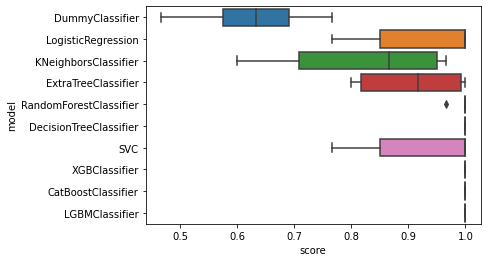

In [ ]:
sns.boxplot(data=models_df, x='score', y='model')

In [ ]:
sns.boxplot(data=models_df, x='score', y='num_trans')

<AxesSubplot:xlabel='score', ylabel='num_trans'>

In [ ]:
sns.boxplot(data=models_df, x='score', y='cat_trans')

<AxesSubplot:xlabel='time_elapsed', ylabel='model'>

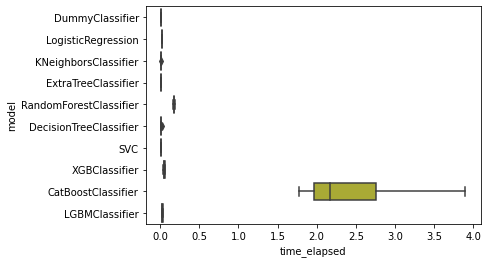

In [129]:
sns.boxplot(data=models_df, x='time_elapsed', y='model')